# Title: Image Classification of Shark Tank Judges
## Machine Learning Final Project
### Guided by: Professor. Travis Milburn
### Presented by: Maryam Merchant



In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test_images/mark5.jpeg')
img.shape

#it is x, y and rgb channel(3rd variable)

(1654, 1200, 3)

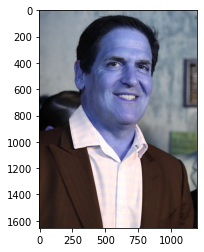

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

#gray image to remove the third dimension

(1654, 1200)

In [5]:
gray

array([[125, 128, 139, ..., 164, 167, 171],
       [130, 129, 134, ..., 164, 165, 165],
       [134, 133, 130, ..., 166, 165, 163],
       ...,
       [ 32,  30,  31, ...,  11,  11,  11],
       [ 32,  30,  30, ...,  11,  12,  12],
       [ 32,  30,  30, ...,  12,  12,  12]], dtype=uint8)

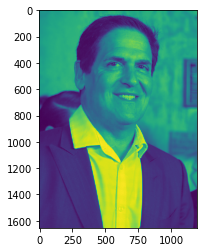

In [6]:
plt.imshow(gray)

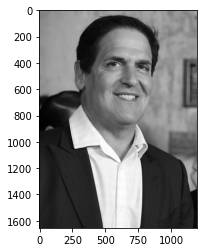

In [7]:
plt.imshow(gray, cmap="gray")

In [9]:
# Open Cv Haar cascades to detect face and eyes of images

In [10]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')


faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[403, 200, 567, 567]], dtype=int32)

In [12]:
(x,y,w,h) = faces[0]
x,y,w,h

#x,y,width,height of above image. It will capture the sqaure of the image

(403, 200, 567, 567)

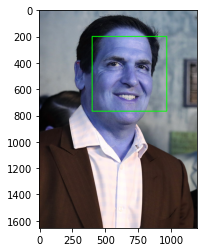

In [13]:
#in open cv we can do rectangle and (0,255,0) is green color rectangle and 6 is the width or size of rectangle
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),6)
plt.imshow(face_img)

#img is my original image that I loaded

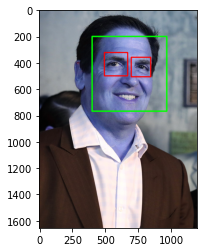

In [14]:
# Here, we are drawing rectangle around face and using eye_cascade to draw rectangle around eyes. 
#For loop is used to loop around multiple image, though here we are using a single image.
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),9)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),8)
        

plt.figure()
plt.imshow(face_img, cmap='gray')

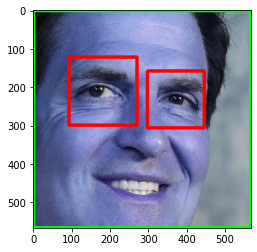

In [16]:
#roi is region of interest
%matplotlib inline
plt.imshow(roi_color, cmap="gray")

#we are interested in this cropped image
#so we will crop all the images and capture in another folder as we are interested in the cropped part of face

In [17]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if(img is not None):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color

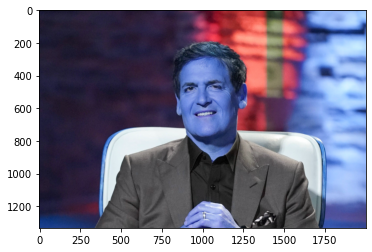

In [18]:
#another example of image to crop
original_image = cv2.imread('./test_images/mark2.jpeg')
plt.imshow(original_image)

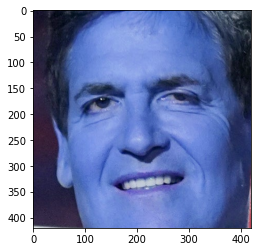

In [19]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/mark2.jpeg')
plt.imshow(cropped_image)

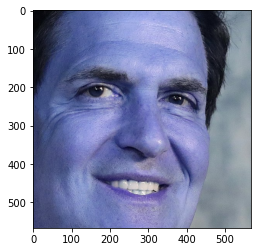

In [20]:
cropped_image2 = get_cropped_image_if_2_eyes('test_images/mark5.jpeg')
#plt.imshow(cropped_image2)

plt.imshow(cropped_image2)

In [21]:
path_to_data = "./final_dataset/"
path_to_cr_data = './final_dataset/cropped/'


In [22]:
import os
img_directory = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_directory.append(entry.path)

In [23]:
img_directory

['./final_dataset/Kevin_Leary',
 './final_dataset/Barabara_Corcoran',
 './final_dataset/Lori_Greiner',
 './final_dataset/Robert_Herjavec',
 './final_dataset/Mark_cuban']

In [24]:
# will create cropped folder
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [25]:
for img_dir in img_directory:
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

Kevin_Leary
Barabara_Corcoran
Lori_Greiner
Robert_Herjavec
Mark_cuban


In [26]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_directory:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./final_dataset/cropped/Kevin_Leary


libpng warning: iCCP: known incorrect sRGB profile


Generating cropped images in folder:  ./final_dataset/cropped/Barabara_Corcoran
Generating cropped images in folder:  ./final_dataset/cropped/Lori_Greiner


libpng warning: iCCP: known incorrect sRGB profile


Generating cropped images in folder:  ./final_dataset/cropped/Robert_Herjavec
Generating cropped images in folder:  ./final_dataset/cropped/Mark_cuban


# Now you should have cropped folder under datasets folder that contains cropped images
# Manually examine cropped folder and delete any unwanted images

# Preprocessing: Use wavelet transform as a feature for traning our model
#### In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

In [27]:
import numpy as np
import pywt
import cv2   

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

#learn more about forier transform and wavelet transform

In [28]:
cropped_img = np.array(roi_color)
cropped_img.shape

(237, 237, 3)

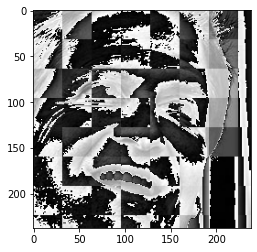

In [29]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [30]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Kevin_Leary': ['./final_dataset/cropped/Kevin_Leary/Kevin_Leary22.jpg',
  './final_dataset/cropped/Kevin_Leary/Kevin_Leary36.jpg',
  './final_dataset/cropped/Kevin_Leary/Kevin_Leary37.jpg',
  './final_dataset/cropped/Kevin_Leary/Kevin_Leary23.jpg',
  './final_dataset/cropped/Kevin_Leary/Kevin_Leary35.jpg',
  './final_dataset/cropped/Kevin_Leary/Kevin_Leary21.jpg',
  './final_dataset/cropped/Kevin_Leary/Kevin_Leary20.jpg',
  './final_dataset/cropped/Kevin_Leary/Kevin_Leary34.jpg',
  './final_dataset/cropped/Kevin_Leary/Kevin_Leary30.jpg',
  './final_dataset/cropped/Kevin_Leary/Kevin_Leary24.jpg',
  './final_dataset/cropped/Kevin_Leary/Kevin_Leary18.jpg',
  './final_dataset/cropped/Kevin_Leary/.DS_Store',
  './final_dataset/cropped/Kevin_Leary/Kevin_Leary19.jpg',
  './final_dataset/cropped/Kevin_Leary/Kevin_Leary25.jpg',
  './final_dataset/cropped/Kevin_Leary/Kevin_Leary31.jpg',
  './final_dataset/cropped/Kevin_Leary/Kevin_Leary27.jpg',
  './final_dataset/cropped/Kevin_Leary/Kevin_Lear

In [31]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Kevin_Leary': 0,
 'Barabara_Corcoran': 1,
 'Lori_Greiner': 2,
 'Robert_Herjavec': 3,
 'Mark_cuban': 4}

In [32]:
class_dict[celebrity_name]

4

In [33]:
X = []
y = []
for celebrity_name, training_files, in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])
        
#vertically stacking the image 

In [34]:
X

[array([[109],
        [ 68],
        [ 73],
        ...,
        [  0],
        [  0],
        [ 22]], dtype=uint8),
 array([[ 91],
        [100],
        [157],
        ...,
        [ 56],
        [  0],
        [252]], dtype=uint8),
 array([[151],
        [143],
        [177],
        ...,
        [  6],
        [ 35],
        [239]], dtype=uint8),
 array([[218],
        [212],
        [213],
        ...,
        [  1],
        [  0],
        [  0]], dtype=uint8),
 array([[126],
        [ 43],
        [ 15],
        ...,
        [250],
        [  3],
        [242]], dtype=uint8),
 array([[237],
        [237],
        [237],
        ...,
        [ 39],
        [ 13],
        [ 68]], dtype=uint8),
 array([[255],
        [255],
        [254],
        ...,
        [ 10],
        [ 66],
        [240]], dtype=uint8),
 array([[ 49],
        [ 57],
        [ 75],
        ...,
        [239],
        [  0],
        [  1]], dtype=uint8),
 array([[252],
        [245],
        [245],
        ...

In [35]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [36]:
len(X)

477

In [37]:
len(y)

477

In [38]:
len(X[0])

4096

In [39]:
32*32*3+32*32
#32*32*3 raw pixel which is raw image x and y is 32*32  and *3 is for rgb and another 32*32 is for rgb

4096

In [40]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(477, 4096)

In [41]:
X[0]

array([109.,  68.,  73., ...,   0.,   0.,  22.])

# Data cleaning process is done. Now we are ready to train our model
We will use differmt machine learning algorithm and find which gives us more accuracy

In [44]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_df_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(x_df_scaled, y)

# Let's use GridSearch to try out different models with different parameters. Goal is to come up with best model with best fine tuned parameters


In [46]:
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import sklearn
from sklearn import svm

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [51]:
model_params = {
    'svm': {
        'model': svm.SVC(random_state=0, probability=True),
        'params' : {
            'svc__C': [1,10,10],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10,100],
            'randomforestclassifier__random_state': [555,5555]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='lbfgs'),
        'params': {
            'logisticregression__max_iter':[10000,100000],
            'logisticregression__random_state': [555,5555]
        }
    },
    'kNeighbors_classifier': {
        'model': KNeighborsClassifier(),
        'params' : {
            'kneighborsclassifier__n_neighbors' : [5,7,9,11,13,15]
        }
    },
    'decisionTree_classifier' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'decisiontreeclassifier__criterion' : ['gini', 'entropy'],
            'decisiontreeclassifier__max_depth' : [2,4,6,8,10,12]
        }
    },
    'adaBoost_Classifier' : {
        'model': AdaBoostClassifier(),
        'params': {
            'adaboostclassifier__n_estimators': [1,5,10,50]
        }
    },
    'gradientBoosting_Classifier' : {
        'model': GradientBoostingClassifier(),
        'params': {
            'gradientboostingclassifier__n_estimators': [1,5,50]
        }
    },
    'bagging_Classifier' : {
        'model': BaggingClassifier(),
        'params': {
            'baggingclassifier__n_estimators': [1,5,50]
        }
    },
    'xGBClassifier' : {
        'model': XGBClassifier(),
        'params': {
            'xgbclassifier__n_estimators': [1,5,10,50,70]
        }
    },
}



In [52]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.873905,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.798435,"{'randomforestclassifier__n_estimators': 100, ..."
2,logistic_regression,0.873905,"{'logisticregression__max_iter': 10000, 'logis..."
3,kNeighbors_classifier,0.669366,{'kneighborsclassifier__n_neighbors': 5}
4,decisionTree_classifier,0.571205,"{'decisiontreeclassifier__criterion': 'gini', ..."
5,adaBoost_Classifier,0.501330,{'adaboostclassifier__n_estimators': 50}
6,gradientBoosting_Classifier,0.787207,{'gradientboostingclassifier__n_estimators': 50}
7,bagging_Classifier,0.789828,{'baggingclassifier__n_estimators': 50}
8,xGBClassifier,0.789867,{'xgbclassifier__n_estimators': 50}


In [53]:
print(df)

                         model  best_score  \
0                          svm    0.873905   
1                random_forest    0.798435   
2          logistic_regression    0.873905   
3        kNeighbors_classifier    0.669366   
4      decisionTree_classifier    0.571205   
5          adaBoost_Classifier    0.501330   
6  gradientBoosting_Classifier    0.787207   
7           bagging_Classifier    0.789828   
8                xGBClassifier    0.789867   

                                         best_params  
0             {'svc__C': 1, 'svc__kernel': 'linear'}  
1  {'randomforestclassifier__n_estimators': 100, ...  
2  {'logisticregression__max_iter': 10000, 'logis...  
3           {'kneighborsclassifier__n_neighbors': 5}  
4  {'decisiontreeclassifier__criterion': 'gini', ...  
5           {'adaboostclassifier__n_estimators': 50}  
6   {'gradientboostingclassifier__n_estimators': 50}  
7            {'baggingclassifier__n_estimators': 50}  
8                {'xgbclassifier__n_estimato

In [54]:
for param in KNeighborsClassifier().get_params().keys():
    print(param)

algorithm
leaf_size
metric
metric_params
n_jobs
n_neighbors
p
weights


In [55]:

for param in LogisticRegression().get_params().keys():
    print(param)

C
class_weight
dual
fit_intercept
intercept_scaling
l1_ratio
max_iter
multi_class
n_jobs
penalty
random_state
solver
tol
verbose
warm_start


In [56]:
%%time
LR = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=555)
RF = RandomForestClassifier(n_estimators = 100, random_state=555)
SVM = SVC(random_state=0, probability=True)
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(n_estimators = 5)
BC = BaggingClassifier(n_estimators = 5)
GBC = GradientBoostingClassifier(n_estimators = 5)
# clf_XGB = XGBClassifier(n_estimators = 100, objective= 'binary:logistic', seed=555, use_label_encoder=False)
clf_XGB = XGBClassifier(n_estimators = 5, seed=555, eval_metric='logloss')
clfs = []
print('5-fold cross validation:\n')
for clf, label in zip([LR, RF,SVM, KNC, DTC, ABC, BC, GBC, clf_XGB],
                      ['Logistic Regression',
                       'Random Forest',
                       'Support Vector Machine',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting',
                       'XGBoost']):
    scores = sklearn.model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train, y_train)
    clfs.append(md)
    print("Test Accuracy: %0.4f " % (sklearn.metrics.accuracy_score(clf.predict(X_test), y_test)))

5-fold cross validation:

Train CV Accuracy: 0.874 (+/- 0.031) [Logistic Regression]
Test Accuracy: 0.8833 
Train CV Accuracy: 0.798 (+/- 0.037) [Random Forest]
Test Accuracy: 0.7417 
Train CV Accuracy: 0.835 (+/- 0.022) [Support Vector Machine]
Test Accuracy: 0.8417 
Train CV Accuracy: 0.669 (+/- 0.050) [KNeighbors]
Test Accuracy: 0.6250 
Train CV Accuracy: 0.588 (+/- 0.040) [Decision Tree]
Test Accuracy: 0.5583 
Train CV Accuracy: 0.443 (+/- 0.048) [Ada Boost]
Test Accuracy: 0.4583 
Train CV Accuracy: 0.627 (+/- 0.046) [Bagging]
Test Accuracy: 0.6083 
Train CV Accuracy: 0.658 (+/- 0.007) [Gradient Boosting]
Test Accuracy: 0.6750 
Train CV Accuracy: 0.706 (+/- 0.042) [XGBoost]
Test Accuracy: 0.7417 
CPU times: user 1min 43s, sys: 3.67 s, total: 1min 46s
Wall time: 52.3 s


# using superLearner

In [57]:
from mlens.ensemble import SuperLearner
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer

from sklearn.metrics import accuracy_score

[MLENS] backend: threading


In [58]:
# --- Build ---
# Passing a scoring function will create cv scores during fitting
# the scorer should be a simple function accepting to vectors and returning a scalar
ensemble = SuperLearner(scorer=accuracy_score, random_state=555, verbose=2)
## random_state is used for making thing consistent.

In [59]:
# Build the first layer
ensemble.add([SVM, LR])

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...c6024c0>)],
   n_jobs=-1, name='group-0', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function accuracy_score at 0x7f947c6024c0>, shuffle=False,
       verbose=2)

In [60]:
# Attach the final meta estimator
# ensemble.add_meta(LogisticRegression())
ensemble.add_meta(RandomForestClassifier())
# we can stack together different models in ensemble. Output for one is input for another.

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...c6024c0>)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function accuracy_score at 0x7f947c6024c0>, shuffle=False,
       verbose=2)

In [61]:
X_train.shape

(357, 4096)

In [63]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [64]:
# Fit ensemble
ensemble.fit(X_train, y_train)


Fitting 2 layers
Processing layer-1             done | 00:00:06
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:06


SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...c6024c0>)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function accuracy_score at 0x7f947c6024c0>, shuffle=False,
       verbose=2)

In [65]:
#pred_vals = ensemble.predict(X_test)
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble.predict(X_train), y_train))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(ensemble.predict(X_test), y_test))


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Train :  0.9971988795518207

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00
Accuracy - Test :  0.875


In [66]:
print("Fit data:\n%r" % ensemble.data)

Fit data:
                               score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  logisticregression       0.83     0.01  2.28  0.04  0.00  0.00
layer-1  svc                      0.75     0.00  4.49  0.02  0.32  0.00



# conculsion:
I got more accuracy using different hyper parameters. So, 
* logistic regression: 87.73%
* SVM : 87.73%